# Kaggle Project.ver2

## Describe Your Dataset
ver1에서 샘플의 수가 크고
nan 데이터가 많아 오류발생.

->ver2에서는 데이터 전처리 후 진행


**URL:** https://www.kaggle.com/datasets/utkarshx27/riding-with-a-driver-who-has-been-drinking?resource=download

**Task:**

학생들의 음주운전 가능성 예측

**Datasets**

total data = 12282
**
-> total data = 2000
Train:Val:Test= 8:2:2


**Features(x):**

'female'= 1=female or 0=male

'grade' = 	Year in high school: 9, 10, 11, or 12

'smoke' = 	Ever smoked? 1=yes or 0=no

'DriverLicense' = Have a driver's license? 1=yes or 0=no

'age4' = Age (in years)

**Target(y):**

ride.alc.driver = 1=rode with a drinking driver in past 30 days or 0=did not

---

## Build Your Model

### Data preprocessing

In [21]:
import numpy as np
import pandas as pd
import warnings

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import  StandardScaler

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix

# Model Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings(action='ignore')
## codes

In [22]:

data=pd.read_csv("data/data1.csv" )
data.head()

#데이터셋 불러오기

,ride.alc.driver,female,grade,age4,smoke,DriverLicense
0,0,1,11,16,1,1
1,1,0,11,16,1,1
2,1,0,11,16,0,1
3,0,0,12,17,0,1
4,0,0,11,17,1,1


In [23]:
type(data)

pandas.core.frame.DataFrame

In [24]:
df=pd.DataFrame(data)
df

,ride.alc.driver,female,grade,age4,smoke,DriverLicense
0,0,1,11,16,1,1
1,1,0,11,16,1,1
2,1,0,11,16,0,1
3,0,0,12,17,0,1
4,0,0,11,17,1,1
...,...,...,...,...,...,...
1995,0,0,11,16,0,1
1996,1,1,11,17,1,1
1997,0,1,9,15,1,0
1998,1,1,10,16,1,1


In [25]:
df["ride.alc.driver"].value_counts()

0    1382
1     618
Name: ride.alc.driver, dtype: int64

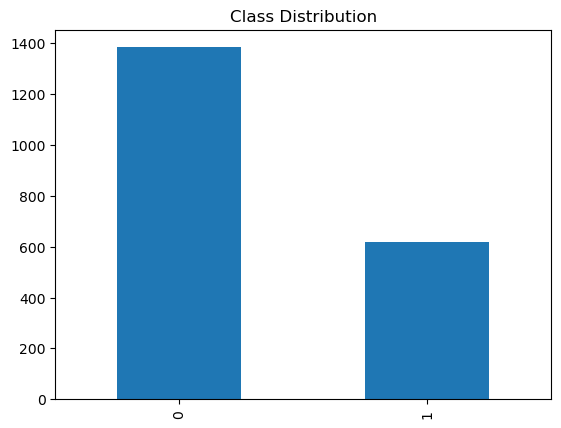

In [26]:
df["ride.alc.driver"].value_counts().plot(kind="bar")
plt.title("Class Distribution");

In [27]:
x = data.drop(['ride.alc.driver'], axis = 1)
y = data['ride.alc.driver']

scaler = StandardScaler()
X = scaler.fit_transform(x)

df = pd.DataFrame(X, columns = x.columns.values.tolist())
df

,female,grade,age4,smoke,DriverLicense
0,0.968496,0.437522,-0.117087,0.937923,0.695471
1,-1.032529,0.437522,-0.117087,0.937923,0.695471
2,-1.032529,0.437522,-0.117087,-1.066186,0.695471
3,-1.032529,1.341494,0.704577,-1.066186,0.695471
4,-1.032529,0.437522,0.704577,0.937923,0.695471
...,...,...,...,...,...
1995,-1.032529,0.437522,-0.117087,-1.066186,0.695471
1996,0.968496,0.437522,0.704577,0.937923,0.695471
1997,0.968496,-1.370421,-0.938751,0.937923,-1.437875
1998,0.968496,-0.466449,-0.117087,0.937923,0.695471


### DATA SPIT
Train:Val:Test = 8:2:2


In [8]:

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=20)
X_tr, X_val, y_tr, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=20)

### Model Construction

In [9]:
###Logistic Regression


model_lr = LogisticRegression()


###Decision Tree


model_dt = DecisionTreeClassifier()

grid = {'min_samples_split': [5, 10, 20, 50, 100],
       'max_depth': [5, 10, 15, 20]}

model_dt = GridSearchCV(model_dt, grid, cv=5)


###SVC

model_svc = SVC()

grid = {'kernel': ['linear','rbf','poly']}

model_svc = GridSearchCV(model_svc, grid, cv=5)


###kNN

model_knn = KNeighborsClassifier() 

grid = {"n_neighbors":np.arange(1,30)}

model_knn = GridSearchCV(model_knn, grid, cv=5)

###Random Forest

model_rf = RandomForestClassifier()

grid = {'n_estimators':[100,200,300,400,500], 'max_depth': [2, 5, 10]}

model_rf = GridSearchCV(model_rf, grid, cv=5)


### Train Model & Select Model

---

In [10]:
def accuracy(pre, y):
    return sum(pre==y)/len(y)

#########Logistic regression

model_lr.fit(X_tr, y_tr)

tr_pred_lr = model_lr.predict(X_tr)
val_pred_lr = model_lr.predict(X_val)

tr_acc_lr = accuracy_score(tr_pred_lr, y_tr)
val_acc_lr = accuracy_score(val_pred_lr, y_val)

print('Training Accuracy : ', tr_acc_lr)
print('Validation Accuracy : ', val_acc_lr)

Training Accuracy :  0.6866666666666666
Validation Accuracy :  0.7175


In [11]:
##########Decision Tree

model_dt.fit(X_tr, y_tr)

tr_pred_dt = model_dt.predict(X_tr)
val_pred_dt = model_dt.predict(X_val)

tr_acc_dt = accuracy_score(tr_pred_dt, y_tr)
val_acc_dt = accuracy_score(val_pred_dt, y_val)

print('Training Accuracy : ', tr_acc_dt)
print('Validation Accuracy : ', val_acc_dt)

Training Accuracy :  0.6983333333333334
Validation Accuracy :  0.6675


In [12]:
model_dt.best_params_

{'max_depth': 10, 'min_samples_split': 100}

In [13]:
##########SVC

model_svc.fit(X_tr, y_tr)

tr_pred_svc = model_svc.predict(X_tr)
val_pred_svc = model_svc.predict(X_val)

tr_acc_svc = accuracy_score(tr_pred_svc, y_tr)
val_acc_svc = accuracy_score(val_pred_svc, y_val)

print('Training Accuracy : ', tr_acc_svc)
print('Validation Accuracy : ', val_acc_svc)

Training Accuracy :  0.6841666666666667
Validation Accuracy :  0.7125


In [14]:
model_svc.best_params_

{'kernel': 'poly'}

In [15]:
#####knn

model_knn.fit(X_tr, y_tr)

tr_pred_knn = model_knn.predict(X_tr)
val_pred_knn = model_knn.predict(X_val)

tr_acc_knn = accuracy_score(tr_pred_knn, y_tr)
val_acc_knn = accuracy_score(val_pred_knn, y_val)

print('Training Accuracy : ', tr_acc_knn)
print('Validation Accuracy : ', val_acc_knn)

Training Accuracy :  0.6891666666666667
Validation Accuracy :  0.71


In [16]:
model_knn.best_params_

{'n_neighbors': 4}

In [28]:
######Random Forest


model_rf.fit(X_tr, y_tr)

tr_pred_rf = model_rf.predict(X_tr)
val_pred_rf = model_rf.predict(X_val)

tr_acc_rf = accuracy_score(tr_pred_rf, y_tr)
val_acc_rf = accuracy_score(val_pred_rf, y_val)

print('Training Accuracy : ', tr_acc_rf)
print('Validation Accuracy : ', val_acc_rf)

Training Accuracy :  0.7016666666666667
Validation Accuracy :  0.67


In [18]:
#모델별 accuracy 평가
data_dic = {'Logistic Regression': [tr_acc_lr, val_acc_lr], 'KNN': [tr_acc_knn, val_acc_knn], 'Decision Tree': [tr_acc_dt, val_acc_dt], 'Random Forest': [tr_acc_rf, val_acc_rf], 'SVC': [tr_acc_svc, val_acc_svc]}
df_acc = pd.DataFrame.from_dict(data_dic, orient = 'index', columns = ['Train Accuracy', 'Validation Accuracy'])
df_acc.style.highlight_max(axis=0)

,Train Accuracy,Validation Accuracy
Logistic Regression,0.686667,0.717500
KNN,0.689167,0.710000
Decision Tree,0.698333,0.667500
Random Forest,0.701667,0.670000
SVC,0.684167,0.712500


## Performance

In [29]:
#Test data에 대한 accuracy 평가
te_pred_rf = model_rf.predict(X_te)
te_acc_rf = accuracy_score(te_pred_rf, y_te)
print('Test Accuracy of Random Forest : ', te_acc_rf)

Test Accuracy of Random Forest :  0.6475


The results explains

	Train Accuracy에서 가장 높은 퍼포먼스를 내는 Random Forest 를 최종 모델로 선정,
    하지만 실제는 0.67 정도의 낮은 성능을 보임
    
    데이터의 대부분이 명목변수여서 높은 성능을 보이지 못하는 듯 보임.
    추가적인 설명변수가 필요하다고 판단.